In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

all mean:  2387.0699421965305  migrant mean:  2378.4005780346806


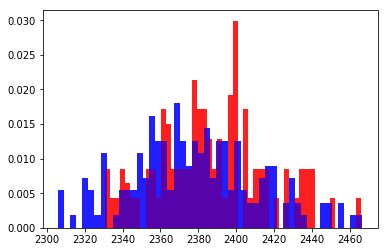

In [9]:
schools = pd.read_csv('data/third_math_AB.csv')
_ = plt.hist(schools['all score'],bins = 50,color ='red',alpha=.5,normed =True)
_ = plt.hist(schools['migrant score'],bins =50,color = 'blue',alpha = .5,normed = True)
print("all mean: ",np.mean(schools['all score'])," migrant mean: ", np.mean(schools['migrant score']))
plt.show()

all mean:  2386.88586  migrant mean:  2378.53619


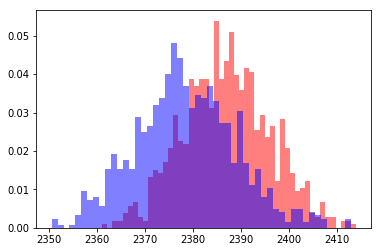

In [16]:
bs_all = np.empty(1000)
bs_migrant = np.empty(1000)
for i in range(1000):
    bs_all[i] = np.mean(np.random.choice(schools['all score'],size=10))
    bs_migrant[i] = np.mean(np.random.choice(schools['migrant score'],size=10))
    
_ = plt.hist(bs_all,bins = 50,color ='red',alpha=.5,normed =True)
_ = plt.hist(bs_migrant,bins =50,color = 'blue',alpha = .5,normed = True)
print("all mean: ",np.mean(bs_all)," migrant mean: ", np.mean(bs_migrant))

plt.show()

BootStrapping Reveals a very clear difference in means bewteen the two populations, but we are cheifly interested how the sanctuary variable operates

In [17]:
sanc = schools[schools['sanctuary']==1]
nonsanc = schools[schools['sanctuary']==0]

In [22]:
print("sanc mean: ",np.mean(sanc['migrant score'])," nonsanc mean: ", np.mean(nonsanc['migrant score']))

sanc mean:  2372.996825396827  nonsanc mean:  2381.4954545454543


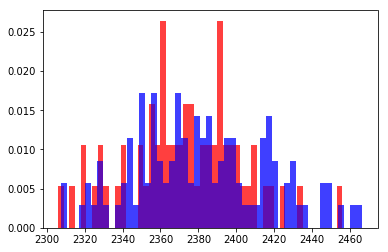

In [20]:
_ = plt.hist(sanc['migrant score'],bins = 50,color ='red',alpha=.5,normed =True)
_ = plt.hist(nonsanc['migrant score'],bins =50,color = 'blue',alpha = .5,normed = True)
plt.show()

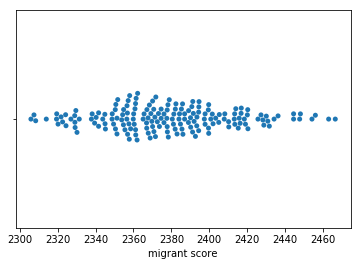

In [27]:
_ = sns.swarmplot(data=schools,x="migrant score",hue="sanctuary")
plt.show()

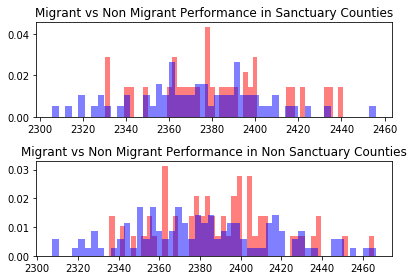

In [31]:
plt.subplot(2,1,1)
_ = plt.hist(sanc['all score'],bins = 50,color ='red',alpha=.5,normed =True)
_ = plt.hist(sanc['migrant score'],bins =50,color = 'blue',alpha = .5,normed = True)
_ = plt.title("Migrant vs Non Migrant Performance in Sanctuary Counties")
plt.subplot(2,1,2)
_ = plt.hist(nonsanc['all score'],bins = 50,color ='red',alpha=.5,normed =True)
_ = plt.hist(nonsanc['migrant score'],bins =50,color = 'blue',alpha = .5,normed = True)
_ = plt.title("Migrant vs Non Migrant Performance in Non Sanctuary Counties")
plt.tight_layout()
plt.show()

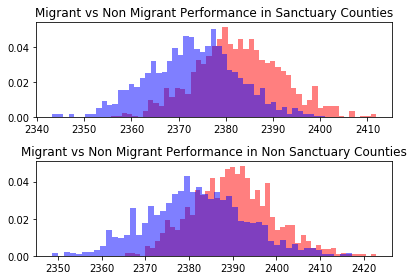

In [34]:
bs_sanc_all = np.empty(1000)
bs_sanc_migrant = np.empty(1000)
bs_nonsanc_all = np.empty(1000)
bs_nonsanc_migrant = np.empty(1000)
for i in range(1000):
    bs_sanc_all[i] = np.mean(np.random.choice(sanc['all score'],size=10))
    bs_sanc_migrant[i] = np.mean(np.random.choice(sanc['migrant score'],size=10))
    bs_nonsanc_all[i] = np.mean(np.random.choice(nonsanc['all score'],size=10))
    bs_nonsanc_migrant[i] = np.mean(np.random.choice(nonsanc['migrant score'],size=10))

plt.subplot(2,1,1)
_ = plt.hist(bs_sanc_all,bins = 50,color ='red',alpha=.5,normed =True)
_ = plt.hist(bs_sanc_migrant,bins =50,color = 'blue',alpha = .5,normed = True)
_ = plt.title("Migrant vs Non Migrant Performance in Sanctuary Counties")
plt.subplot(2,1,2)
_ = plt.hist(bs_nonsanc_all,bins = 50,color ='red',alpha=.5,normed =True)
_ = plt.hist(bs_nonsanc_migrant,bins =50,color = 'blue',alpha = .5,normed = True)
_ = plt.title("Migrant vs Non Migrant Performance in Non Sanctuary Counties")
plt.tight_layout()
plt.show()